In [1]:
import pandas as pd
import numpy as np
import matplotlib as plot
import seaborn as sns
import sklearn
from sklearn import preprocessing
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.utils import class_weight
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report, roc_auc_score,auc
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("Employee_Attrition_Data.csv")

# Size
Coloumns
Statistics

In [3]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1472.000000,1472.000000,1472.000000,1472.000000,1472.0,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,...,1472.000000,1472.0,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000
mean,36.911005,802.176630,9.193614,2.914402,1.0,1026.284647,2.722147,65.858016,2.731658,2.065217,...,2.712636,80.0,0.792799,11.271739,2.795516,2.761549,7.002717,4.224864,2.185462,4.120245
std,9.135781,403.348149,8.101406,1.024252,0.0,602.845099,1.092387,20.337889,0.712616,1.106725,...,1.080526,0.0,0.852000,7.778428,1.292516,0.706050,6.124140,3.622628,3.220839,3.566568
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.750000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,801.500000,7.000000,3.000000,1.0,1023.000000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1557.250000,4.000000,83.250000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2070.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [4]:
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Org
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0.0,5,IBM
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1.0,7,IBM
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,80,0,7,3,3,0,0,0.0,0,IBM
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,80,0,8,3,3,8,7,3.0,0,IBM
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,80,1,6,3,3,2,2,2.0,2,IBM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,80,1,6,0,3,6,2,0.0,3,IBM
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,80,0,17,3,2,9,6,0.0,8,IBM
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,80,0,6,3,4,4,3,1.0,2,IBM
1470,27,Yes,Non-Travel,450,Research & Development,10,4,Technical Degree,1,2069,...,80,0,5,0,3,3,1,0.5,2,Optum


In [5]:
(data.loc[data['Attrition']=='Yes'].count()['EmployeeCount']/data.count()['EmployeeCount'])*100

16.23641304347826

In [6]:
data['Attrition'].value_counts()/data.count()['Attrition'] #attrition rate

No     0.837636
Yes    0.162364
Name: Attrition, dtype: float64

# checking missing value

In [7]:
data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

# Exploratory Analysis

Text(0, 0.5, 'Attrition Percent')

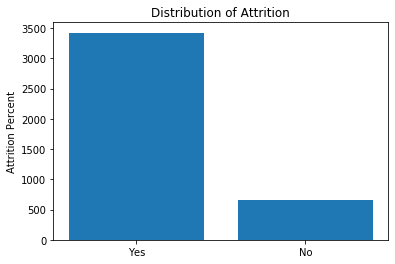

In [8]:
r=['Yes','No']
y=pd.DataFrame(data.Attrition.value_counts()*100/data.shape[1])
plt.bar(r,y.Attrition)
plt.title("Distribution of Attrition")
plt.ylabel('Attrition Percent')

In [9]:
num_val={'Yes':1,'No':0}
data['Attrition']=data['Attrition'].apply(lambda x:num_val[x])
#data['OverTime']=data['OverTime'].apply(lambda x:num_val[x])

In [10]:
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Org
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0.0,5,IBM
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1.0,7,IBM
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,80,0,7,3,3,0,0,0.0,0,IBM
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,80,0,8,3,3,8,7,3.0,0,IBM
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,80,1,6,3,3,2,2,2.0,2,IBM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,80,1,6,0,3,6,2,0.0,3,IBM
1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,80,0,17,3,2,9,6,0.0,8,IBM
1469,34,0,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,80,0,6,3,4,4,3,1.0,2,IBM
1470,27,1,Non-Travel,450,Research & Development,10,4,Technical Degree,1,2069,...,80,0,5,0,3,3,1,0.5,2,Optum


# Correlation

In [11]:
data.corr()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.161715,0.011463,-0.001824,0.206237,NaN,-0.012544,0.009782,0.025953,0.027238,...,0.053120,NaN,0.038765,0.680676,-0.016511,-0.021946,0.311909,0.213880,0.217050,0.202727
Attrition,-0.161715,1.000000,-0.058178,0.077957,-0.027962,NaN,-0.005169,-0.102215,-0.010516,-0.123777,...,-0.044887,NaN,-0.139459,-0.172691,-0.065766,-0.062665,-0.135901,-0.162646,-0.034514,-0.157450
DailyRate,0.011463,-0.058178,1.000000,-0.005060,-0.017602,NaN,-0.052199,0.018154,0.024444,0.044658,...,0.007640,NaN,0.042820,0.015101,0.004103,-0.038093,-0.033534,0.010606,-0.032812,-0.025894
DistanceFromHome,-0.001824,0.077957,-0.005060,1.000000,0.021169,NaN,0.033084,-0.016040,0.030934,0.009005,...,0.006593,NaN,0.044719,0.004526,-0.037117,-0.026508,0.009416,0.018714,0.009956,0.014322
Education,0.206237,-0.027962,-0.017602,0.021169,1.000000,NaN,0.044449,-0.026739,0.015015,0.044882,...,-0.008727,NaN,0.017055,0.147040,-0.028122,0.010298,0.068098,0.058872,0.053448,0.068138
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.012544,-0.005169,-0.052199,0.033084,0.044449,NaN,1.000000,0.018183,0.032248,-0.002666,...,-0.069089,NaN,0.059871,-0.016079,0.018384,0.011082,-0.012754,-0.010492,-0.010232,-0.010576
EnvironmentSatisfaction,0.009782,-0.102215,0.018154,-0.016040,-0.026739,NaN,0.018183,1.000000,-0.050215,-0.007643,...,0.007757,NaN,0.003108,-0.002949,-0.020046,0.027741,0.001231,0.017689,0.016009,-0.005203
HourlyRate,0.025953,-0.010516,0.024444,0.030934,0.015015,NaN,0.032248,-0.050215,1.000000,0.039819,...,0.000895,NaN,0.051696,-0.001084,-0.004984,-0.005153,-0.018489,-0.022615,-0.025828,-0.019127
JobInvolvement,0.027238,-0.123777,0.044658,0.009005,0.044882,NaN,-0.002666,-0.007643,0.039819,1.000000,...,0.034866,NaN,0.019209,-0.007317,-0.020497,-0.013766,-0.022887,0.006536,-0.025396,0.024473


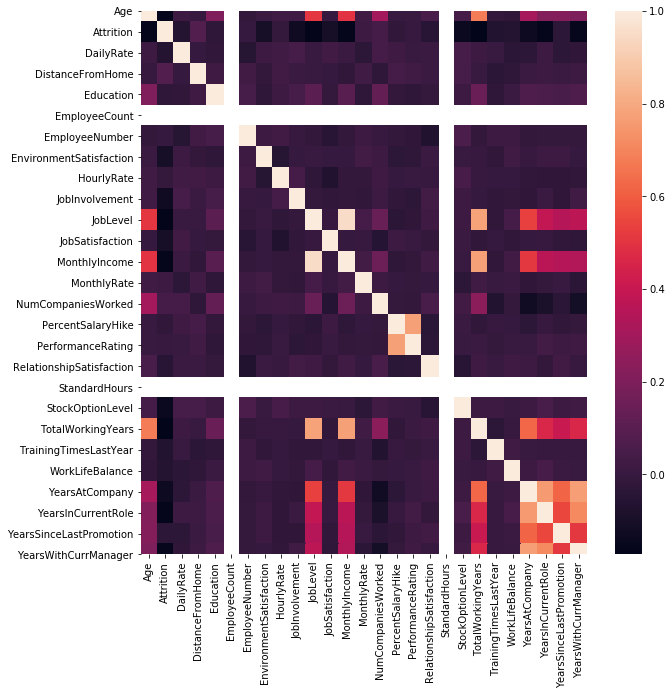

In [12]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(data.corr())
plt.show()

# outlier treatment

In [13]:
df=data.select_dtypes(exclude='object')
df.shape

(1472, 27)

In [14]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
Q1
Q3
IQR

Age                            13.00
Attrition                       0.00
DailyRate                     692.00
DistanceFromHome               12.00
Education                       2.00
EmployeeCount                   0.00
EmployeeNumber               1065.50
EnvironmentSatisfaction         2.00
HourlyRate                     35.25
JobInvolvement                  1.00
JobLevel                        2.00
JobSatisfaction                 2.00
MonthlyIncome                5466.00
MonthlyRate                 12409.50
NumCompaniesWorked              3.00
PercentSalaryHike               6.00
PerformanceRating               0.00
RelationshipSatisfaction        2.00
StandardHours                   0.00
StockOptionLevel                1.00
TotalWorkingYears               9.00
TrainingTimesLastYear           1.00
WorkLifeBalance                 1.00
YearsAtCompany                  6.00
YearsInCurrentRole              5.00
YearsSinceLastPromotion         3.00
YearsWithCurrManager            5.00
d

In [15]:
((df<(Q1-1.5*IQR)))|(df>(Q1+1.5*IQR))

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1467,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
1468,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1469,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
1470,False,True,False,False,False,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False


In [16]:
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Org
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0.0,5,IBM
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1.0,7,IBM
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,80,0,7,3,3,0,0,0.0,0,IBM
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,80,0,8,3,3,8,7,3.0,0,IBM
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,80,1,6,3,3,2,2,2.0,2,IBM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,80,1,6,0,3,6,2,0.0,3,IBM
1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,80,0,17,3,2,9,6,0.0,8,IBM
1469,34,0,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,80,0,6,3,4,4,3,1.0,2,IBM
1470,27,1,Non-Travel,450,Research & Development,10,4,Technical Degree,1,2069,...,80,0,5,0,3,3,1,0.5,2,Optum


In [17]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Org'],
      dtype='object')

In [18]:
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Org
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0.0,5,IBM
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1.0,7,IBM
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,80,0,7,3,3,0,0,0.0,0,IBM
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,80,0,8,3,3,8,7,3.0,0,IBM
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,80,1,6,3,3,2,2,2.0,2,IBM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,80,1,6,0,3,6,2,0.0,3,IBM
1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,80,0,17,3,2,9,6,0.0,8,IBM
1469,34,0,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,80,0,6,3,4,4,3,1.0,2,IBM
1470,27,1,Non-Travel,450,Research & Development,10,4,Technical Degree,1,2069,...,80,0,5,0,3,3,1,0.5,2,Optum


# Select The Categorical data

In [19]:
cat_data=data.select_dtypes('object')
cat_data.head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime,Org
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes,IBM
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No,IBM
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes,IBM
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes,IBM
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No,IBM


In [20]:
np.unique(cat_data['Department'])

array(['Human Resources', 'Research & Development', 'Sales'], dtype=object)

In [21]:
dict1={'Human Resources':1,'Research & Development':2,'Sales':3}

In [22]:
cat_data['Department']=cat_data['Department'].apply (lambda x:dict1[x])

In [23]:
np.unique(cat_data['BusinessTravel'])

array(['Non-Travel', 'Travel_Frequently', 'Travel_Rarely'], dtype=object)

In [24]:
dict2={'Non-Travel':1,'Travel_Frequently':2,'Travel_Rarely':3}

In [25]:
cat_data['BusinessTravel']=data['BusinessTravel'].apply(lambda x:dict2[x])

In [26]:
np.unique(cat_data['EducationField'])

array(['Human Resources', 'Life Sciences', 'Marketing', 'Medical',
       'Other', 'Technical Degree'], dtype=object)

In [27]:
dict3={'Human Resources':1, 'Life Sciences':2, 'Marketing':3, 'Medical':4,
       'Other':5, 'Technical Degree':6}

In [28]:
cat_data['EducationField']=cat_data['EducationField'].apply(lambda x:dict3[x])

In [29]:
np.unique(cat_data['Org'])

array(['IBM', 'Optum'], dtype=object)

In [30]:
dict4={'IBM':1, 'Optum':2}

In [31]:
cat_data['Org']=cat_data['Org'].apply(lambda x:dict4[x])

In [32]:
np.unique(cat_data['JobRole'])

array(['Healthcare Representative', 'Human Resources',
       'Laboratory Technician', 'Manager', 'Manufacturing Director',
       'Research Director', 'Research Scientist', 'Sales Executive',
       'Sales Representative'], dtype=object)

In [33]:
dict5={'Healthcare Representative':1, 'Human Resources':2,
       'Laboratory Technician':3, 'Manager':4, 'Manufacturing Director':5,
       'Research Director':6, 'Research Scientist':7, 'Sales Executive':8,
       'Sales Representative':9}

In [34]:
cat_data['JobRole']=cat_data['JobRole'].apply(lambda x:dict5[x])

In [35]:
np.unique(cat_data['Gender'])

array(['Female', 'Male'], dtype=object)

In [36]:
dict6={'Female':0, 'Male':1}

In [37]:
cat_data['Gender']=cat_data['Gender'].apply(lambda x:dict6[x])

In [38]:
cat_data.drop(['Over18','Org','OverTime','MaritalStatus',],axis=1)

,BusinessTravel,Department,EducationField,Gender,JobRole
0,3,3,2,0,8
1,2,2,2,1,7
2,3,2,5,1,3
3,2,2,2,0,7
4,3,2,4,1,3
...,...,...,...,...,...
1467,3,2,2,1,5
1468,2,3,4,1,8
1469,3,2,4,1,3
1470,1,2,6,1,7


In [39]:
num_data = data.select_dtypes(exclude = 'object')
num_data.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1102,1,2,1,1,2,94,3,...,1,80,0,8,0,1,6,4,0.0,5
1,49,0,279,8,1,1,2,3,61,2,...,4,80,1,10,3,3,10,7,1.0,7
2,37,1,1373,2,2,1,4,4,92,2,...,2,80,0,7,3,3,0,0,0.0,0
3,33,0,1392,3,4,1,5,4,56,3,...,3,80,0,8,3,3,8,7,3.0,0
4,27,0,591,2,1,1,7,1,40,3,...,4,80,1,6,3,3,2,2,2.0,2


In [40]:
final_data = pd.concat([num_data,cat_data],axis = 1)

In [41]:
final=final_data.drop(['MaritalStatus','Over18','OverTime'],axis=1)

In [42]:
final

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel,Department,EducationField,Gender,JobRole,Org
0,41,1,1102,1,2,1,1,2,94,3,...,6,4,0.0,5,3,3,2,0,8,1
1,49,0,279,8,1,1,2,3,61,2,...,10,7,1.0,7,2,2,2,1,7,1
2,37,1,1373,2,2,1,4,4,92,2,...,0,0,0.0,0,3,2,5,1,3,1
3,33,0,1392,3,4,1,5,4,56,3,...,8,7,3.0,0,2,2,2,0,7,1
4,27,0,591,2,1,1,7,1,40,3,...,2,2,2.0,2,3,2,4,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1467,27,0,155,4,3,1,2064,2,87,4,...,6,2,0.0,3,3,2,2,1,5,1
1468,49,0,1023,2,3,1,2065,4,63,2,...,9,6,0.0,8,2,3,4,1,8,1
1469,34,0,628,8,3,1,2068,2,82,4,...,4,3,1.0,2,3,2,4,1,3,1
1470,27,1,450,10,4,1,2069,3,33,4,...,3,1,0.5,2,1,2,6,1,7,2


In [43]:
y=np.array(final['Attrition'])
y


array([1, 0, 1, ..., 0, 1, 1], dtype=int64)

In [44]:
np.unique(y)

array([0, 1], dtype=int64)

In [45]:
x=final.astype(np.float)
x

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel,Department,EducationField,Gender,JobRole,Org
0,41.0,1.0,1102.0,1.0,2.0,1.0,1.0,2.0,94.0,3.0,...,6.0,4.0,0.0,5.0,3.0,3.0,2.0,0.0,8.0,1.0
1,49.0,0.0,279.0,8.0,1.0,1.0,2.0,3.0,61.0,2.0,...,10.0,7.0,1.0,7.0,2.0,2.0,2.0,1.0,7.0,1.0
2,37.0,1.0,1373.0,2.0,2.0,1.0,4.0,4.0,92.0,2.0,...,0.0,0.0,0.0,0.0,3.0,2.0,5.0,1.0,3.0,1.0
3,33.0,0.0,1392.0,3.0,4.0,1.0,5.0,4.0,56.0,3.0,...,8.0,7.0,3.0,0.0,2.0,2.0,2.0,0.0,7.0,1.0
4,27.0,0.0,591.0,2.0,1.0,1.0,7.0,1.0,40.0,3.0,...,2.0,2.0,2.0,2.0,3.0,2.0,4.0,1.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1467,27.0,0.0,155.0,4.0,3.0,1.0,2064.0,2.0,87.0,4.0,...,6.0,2.0,0.0,3.0,3.0,2.0,2.0,1.0,5.0,1.0
1468,49.0,0.0,1023.0,2.0,3.0,1.0,2065.0,4.0,63.0,2.0,...,9.0,6.0,0.0,8.0,2.0,3.0,4.0,1.0,8.0,1.0
1469,34.0,0.0,628.0,8.0,3.0,1.0,2068.0,2.0,82.0,4.0,...,4.0,3.0,1.0,2.0,3.0,2.0,4.0,1.0,3.0,1.0
1470,27.0,1.0,450.0,10.0,4.0,1.0,2069.0,3.0,33.0,4.0,...,3.0,1.0,0.5,2.0,1.0,2.0,6.0,1.0,7.0,2.0


In [46]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)
x

array([[ 4.47732273e-01,  2.27134229e+00,  7.43589041e-01, ...,
        -1.22613268e+00,  1.03229124e+00, -3.68855557e-02],
       [ 1.32370756e+00, -4.40268295e-01, -1.29752531e+00, ...,
         8.15572419e-01,  6.25781690e-01, -3.68855557e-02],
       [ 9.74462997e-03,  2.27134229e+00,  1.41569352e+00, ...,
         8.15572419e-01, -1.00025652e+00, -3.68855557e-02],
       ...,
       [-3.18746102e-01, -4.40268295e-01, -4.31973778e-01, ...,
         8.15572419e-01, -1.00025652e+00, -3.68855557e-02],
       [-1.08522448e+00,  2.27134229e+00, -8.73429858e-01, ...,
         8.15572419e-01,  6.25781690e-01,  2.71108834e+01],
       [-9.75727567e-01,  2.27134229e+00, -2.53407274e-01, ...,
         8.15572419e-01,  6.25781690e-01,  2.71108834e+01]])

In [48]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [49]:
from sklearn.linear_model import LogisticRegression
#Initialize the classifier
print("Logistic Regression:")

model_LR=LogisticRegression()
#fit the model

model_LR.fit(x_train,y_train)


Logistic Regression:


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [50]:
#predict with test data
y_pred=model_LR.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [51]:
LR_Accuracy=np.mean(y_test==y_pred)
LR_Accuracy

1.0

In [52]:
from sklearn.metrics import confusion_matrix
print("Logistic Regeression")
confusion_matrix(y_test,y_pred)

Logistic Regeression


array([[417,   0],
       [  0,  69]], dtype=int64)

In [53]:
from sklearn.ensemble import RandomForestClassifier
#initializ the classifier
print("Random Forest:")
model_RF=RandomForestClassifier()
#fit the model
model_RF.fit(x_train,y_train)

Random Forest:


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [54]:
#predict the dataset
y_pred=model_RF.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [55]:
#check accuracy
#numpy interepretes Treu and False as 1 and 0
RF_Accuracy=np.mean(y_test==y_pred)
RF_Accuracy

0.9958847736625515

In [56]:
#confusion Matrix
from sklearn.metrics import confusion_matrix
print("Random Forest")
confusion_matrix(y_test,y_pred)


Random Forest


array([[417,   0],
       [  2,  67]], dtype=int64)

In [57]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
#start modelling
model_GBC=GradientBoostingClassifier()
#fit the model
model_GBC.fit(x_train,y_train)    

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [58]:
#Predict with test data
y_pred=model_GBC.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [59]:
#check accuracy
#numpy interepretes Treu and False as 1 and 0
GB_Accuracy=np.mean(y_test==y_pred)
GB_Accuracy

1.0

In [60]:
#confusion Matrix
from sklearn.metrics import confusion_matrix
print("Gradient Boostingt")
confusion_matrix(y_test,y_pred)


Gradient Boostingt


array([[417,   0],
       [  0,  69]], dtype=int64)

In [61]:
from sklearn import neighbors
#start modelling
model_KNN=neighbors.KNeighborsClassifier()
#fit the model
model_KNN.fit(x_train,y_train)  

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [62]:
#Predict with test data
y_pred=model_KNN.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [63]:
#check accuracy
#numpy interepretes Treu and False as 1 and 0
KNN_Accuracy=np.mean(y_test==y_pred)
KNN_Accuracy

0.9526748971193416

In [64]:
#confusion Matrix
from sklearn.metrics import confusion_matrix
print("KNearest Neighbors")
confusion_matrix(y_test,y_pred)


KNearest Neighbors


array([[417,   0],
       [ 23,  46]], dtype=int64)

In [65]:
#Comparison
print('Gradient Boosting :',GB_Accuracy,'\n')
print('Logistic Regression :',LR_Accuracy,'\n')
print('Random Forest :',RF_Accuracy,'\n')
print('KNeighbours:',KNN_Accuracy,'\n')

Gradient Boosting : 1.0 

Logistic Regression : 1.0 

Random Forest : 0.9958847736625515 

KNeighbours: 0.9526748971193416 

